In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import itertools
from itertools import cycle

from datetime import datetime
%matplotlib inline

In [2]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head(10)


(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [3]:
prev = orders[orders.eval_set == 'prior']
prev.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [4]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head(10)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [5]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
products = pd.merge(left=products,right=aisles, how='left', left_on='aisle_id', right_on='aisle_id')
products = pd.merge(left=products,right=departments, how='left', left_on='department_id', right_on='department_id')


print(products.shape)
products.head(10)

(49688, 6)


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
5,6,Dry Nose Oil,11,11,cold flu allergy,personal care
6,7,Pure Coconut Water With Orange,98,7,juice nectars,beverages
7,8,Cut Russet Potatoes Steam N' Mash,116,1,frozen produce,frozen
8,9,Light Strawberry Blueberry Yogurt,120,16,yogurt,dairy eggs
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,water seltzer sparkling water,beverages


In [6]:
order_products_prior = pd.read_csv('order_products__prior.csv')
print(order_products_prior.shape)
order_products_prior.head(10)

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [7]:
"""order_products_train = pd.read_csv('order_products__train.csv')
print(order_products_train.shape)
order_products_train.head(10)"""

"order_products_train = pd.read_csv('order_products__train.csv')\nprint(order_products_train.shape)\norder_products_train.head(10)"

In [8]:
merged_left = pd.merge(left=order_products_prior,right=products, how='left', left_on='product_id', right_on='product_id')
merged_left.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs


In [9]:
print(merged_left[merged_left.product_id == 9327])

          order_id  product_id  add_to_cart_order  reordered   product_name  \
2                2        9327                  3          0  Garlic Powder   
527             63        9327                  3          0  Garlic Powder   
3979           420        9327                  8          1  Garlic Powder   
20356         2160        9327                 15          0  Garlic Powder   
34960         3653        9327                 10          0  Garlic Powder   
35441         3705        9327                 14          1  Garlic Powder   
54877         5810        9327                  3          0  Garlic Powder   
59396         6311        9327                  8          0  Garlic Powder   
63018         6719        9327                  8          0  Garlic Powder   
69215         7357        9327                 12          1  Garlic Powder   
70061         7456        9327                 10          0  Garlic Powder   
76277         8113        9327                 13   

In [10]:
merged_data = pd.merge(left=merged_left,right=prev, how='left', left_on='order_id', right_on='order_id')
merged_data.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,yogurt,dairy eggs,205970,prior,16,5,17,12.0


In [11]:
print(len(list(set(merged_data.product_id.values))))
print(len(list(set(merged_data.user_id.values))))

49677
206209


In [12]:
# Let's check the data for nulls
null_count = merged_data.isnull().sum()
null_count[null_count>0]

days_since_prior_order    2078068
dtype: int64

In [13]:
merged_data = merged_data.fillna(0)

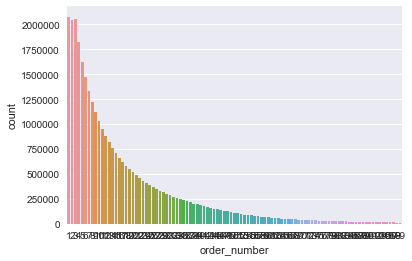

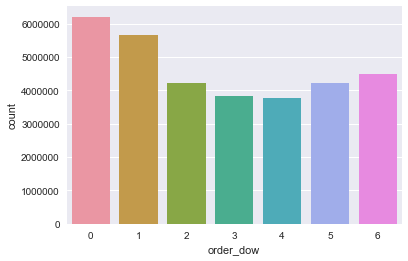

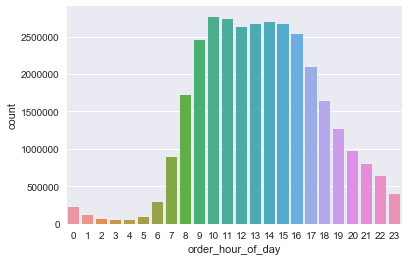

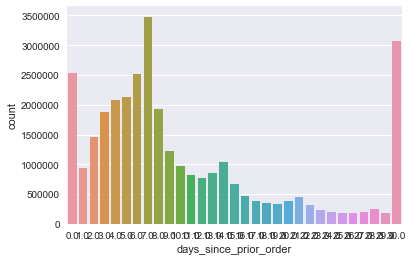

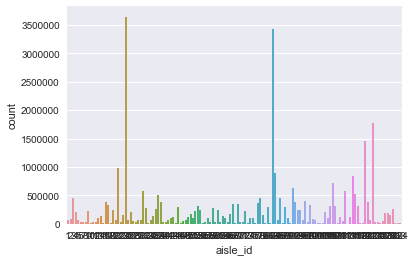

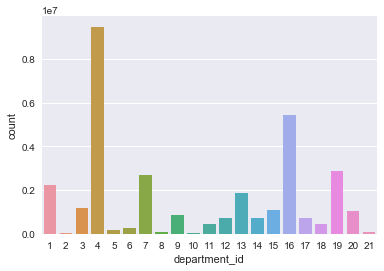

In [14]:
value_count_columns = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'aisle_id', 'department_id']
for feature in value_count_columns:
    sns.countplot(x=feature, data=merged_data)
    plt.show()

In [15]:
merged_data['timeframe'] = pd.qcut(merged_data['order_hour_of_day'], 4, labels=False)

In [16]:
"""latenight_snacks = merged_data[merged_data.timeframe == 0]
sns.countplot(x='product_name', data=latenight_snacks)
plt.show()"""

"latenight_snacks = merged_data[merged_data.timeframe == 0]\nsns.countplot(x='product_name', data=latenight_snacks)\nplt.show()"

In [17]:
merged_data['prev_order'] = merged_data['product_id'].shift(1)
merged_data = merged_data[merged_data.add_to_cart_order != 1]
merged_data.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,timeframe,prev_order
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,0,33120.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,0,28985.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,0,9327.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,0,45918.0
5,2,17794,6,1,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,0,30035.0
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0,0,17794.0
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0,0,40141.0
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,0,1819.0
10,3,24838,2,1,Unsweetened Almondmilk,91,16,soy lactosefree,dairy eggs,205970,prior,16,5,17,12.0,3,33754.0
11,3,17704,3,1,Lemons,123,4,packaged vegetables fruits,produce,205970,prior,16,5,17,12.0,3,24838.0


In [18]:
merged_data1 = resample(merged_data, n_samples=200000)
X = merged_data.drop(['order_id', 'product_name', 'eval_set', 'department', 'aisle'], 1)

In [19]:
"""kclust = np.arange(2, 7, 1)
for k in kclust:
    # Calculate predicted values.
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)

    # Check the solution against the data.
    labelskm = kmeans.labels_
    print(k, metrics.silhouette_score(X, labelskm, metric='euclidean'))"""

"kclust = np.arange(2, 7, 1)\nfor k in kclust:\n    # Calculate predicted values.\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(X)\n\n    # Check the solution against the data.\n    labelskm = kmeans.labels_\n    print(k, metrics.silhouette_score(X, labelskm, metric='euclidean'))"

In [20]:
"""bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
    
# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X) 

# Extract cluster assignments for each data point.
labelsms = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labelsms))

print("Number of estimated clusters: {}".format(n_clusters_))
print('Comparing the assigned categories to the ones in the data:')
print(metrics.silhouette_score(X, labelsms, metric='euclidean'))"""

'bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)\n    \n# Declare and fit the model.\nms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X) \n\n# Extract cluster assignments for each data point.\nlabelsms = ms.labels_\n\n# Coordinates of the cluster centers.\ncluster_centers = ms.cluster_centers_\n\n# Count our clusters.\nn_clusters_ = len(np.unique(labelsms))\n\nprint("Number of estimated clusters: {}".format(n_clusters_))\nprint(\'Comparing the assigned categories to the ones in the data:\')\nprint(metrics.silhouette_score(X, labelsms, metric=\'euclidean\'))'

In [21]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
merged_data_fitted = kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels

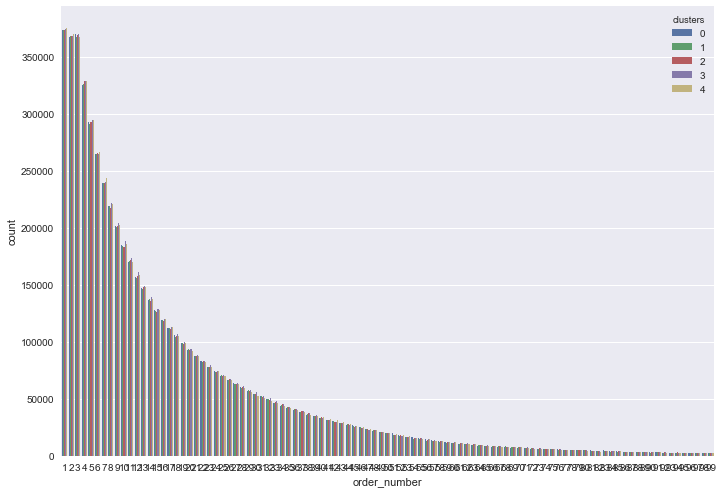

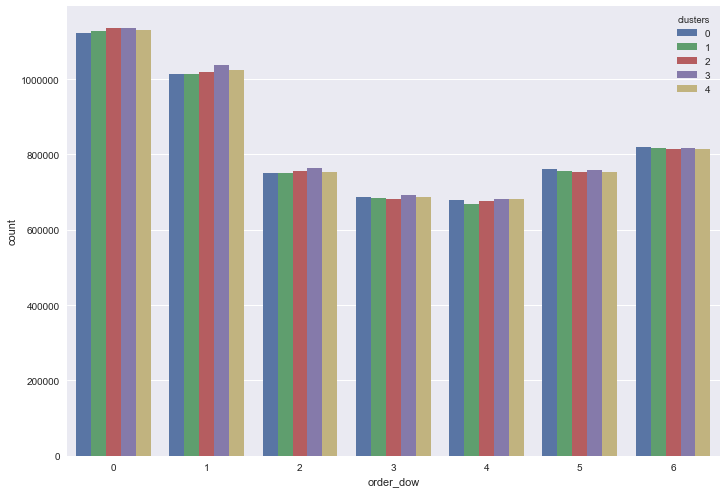

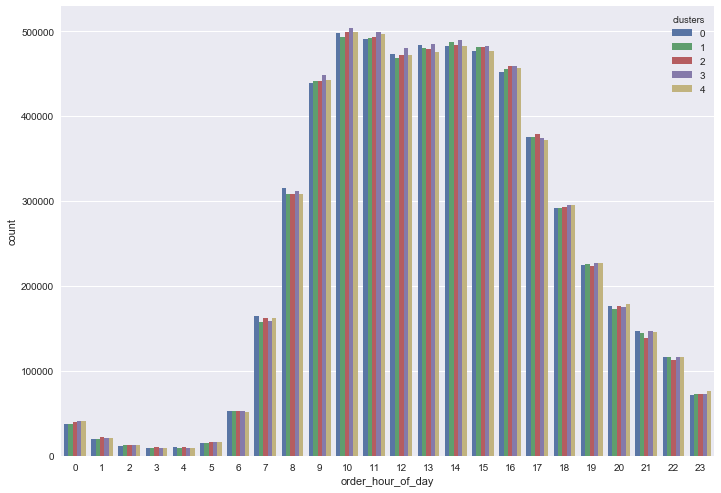

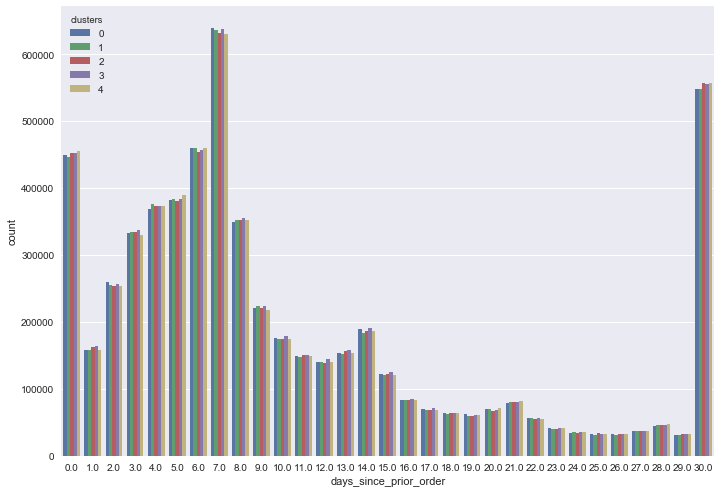

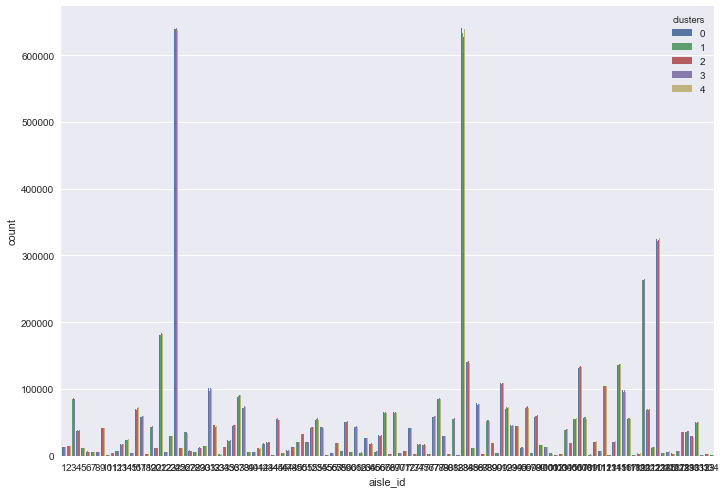

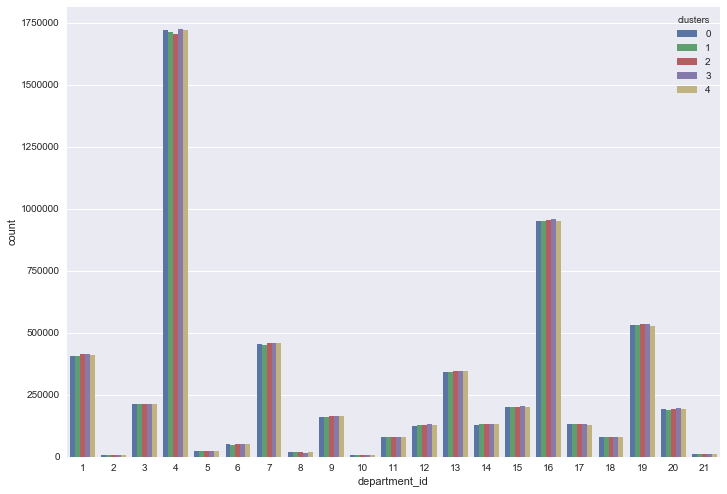

In [22]:
for feature in value_count_columns:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=X.clusters, data=X, ax=ax)
    plt.show()

In [23]:
"""for x in range(k):
    print('Number of products in each cluster:', len(list(set(X[["clusters", "product_id"]].get_group(x)))))
    print('Number of users in each cluster:', len(list(set(X[["clusters", "user_id"]].get_group(x)))))"""

'for x in range(k):\n    print(\'Number of products in each cluster:\', len(list(set(X[["clusters", "product_id"]].get_group(x)))))\n    print(\'Number of users in each cluster:\', len(list(set(X[["clusters", "user_id"]].get_group(x)))))'

In [24]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
merged_data_fitted = kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels

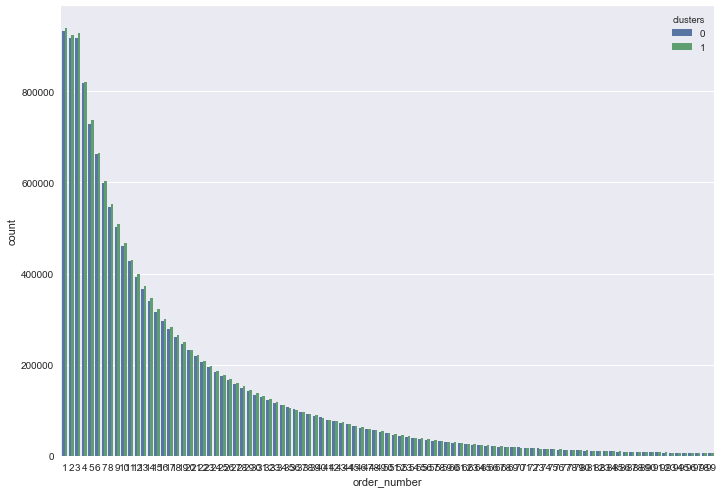

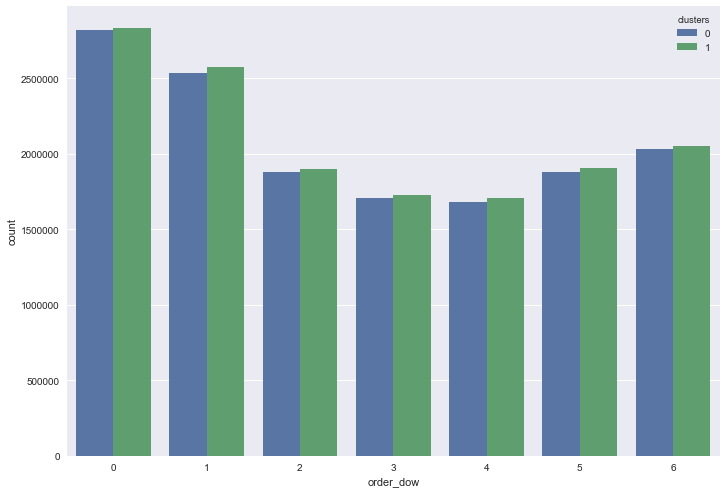

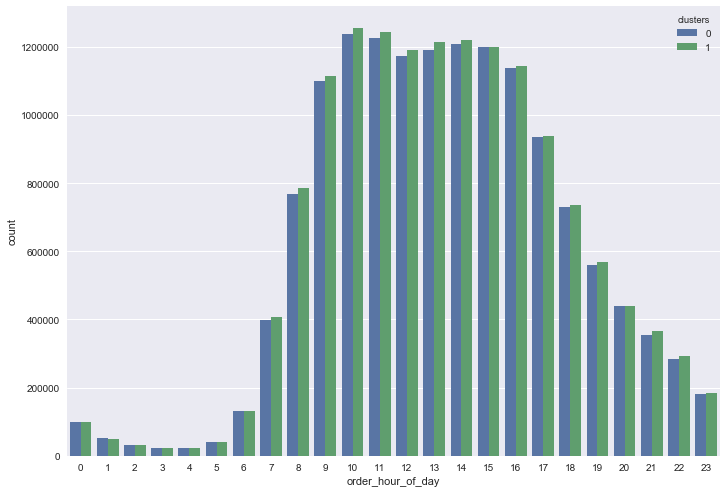

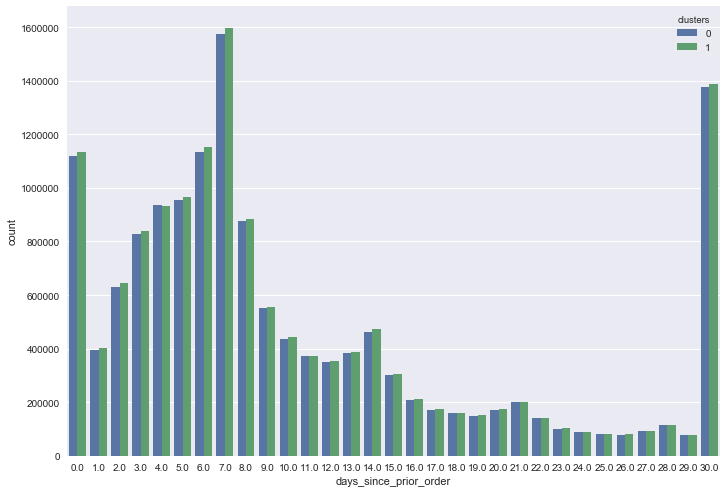

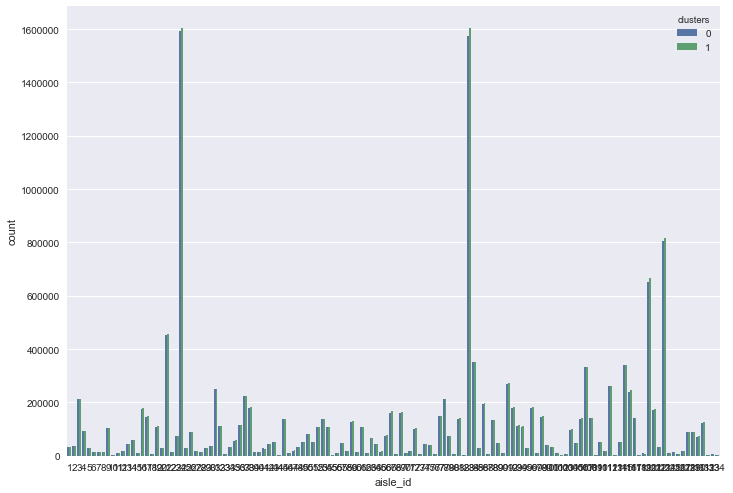

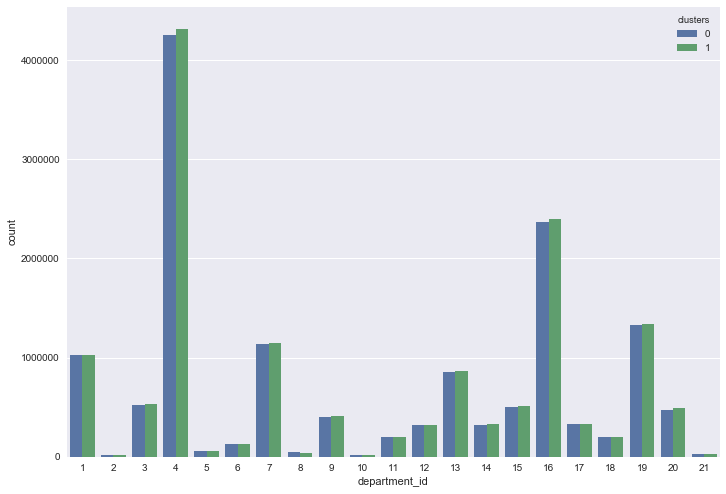

In [25]:
for feature in value_count_columns:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=X.clusters, data=X, ax=ax)
    plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data_fitted = kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels

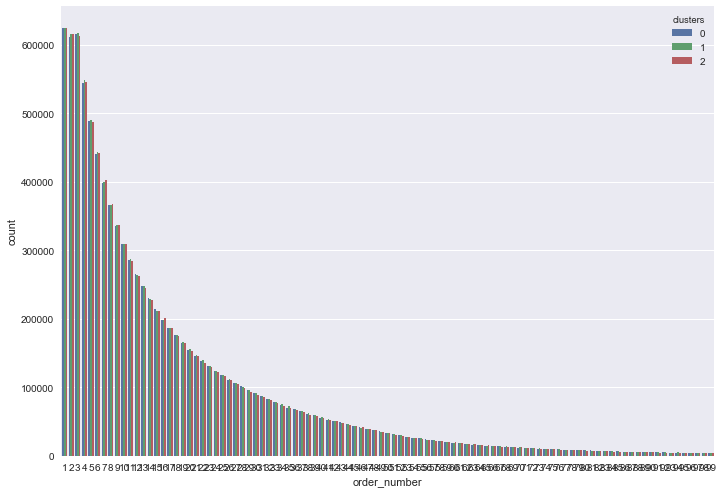

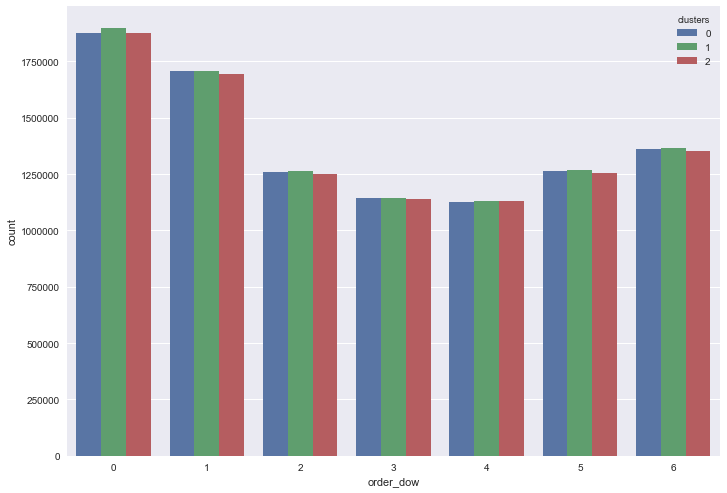

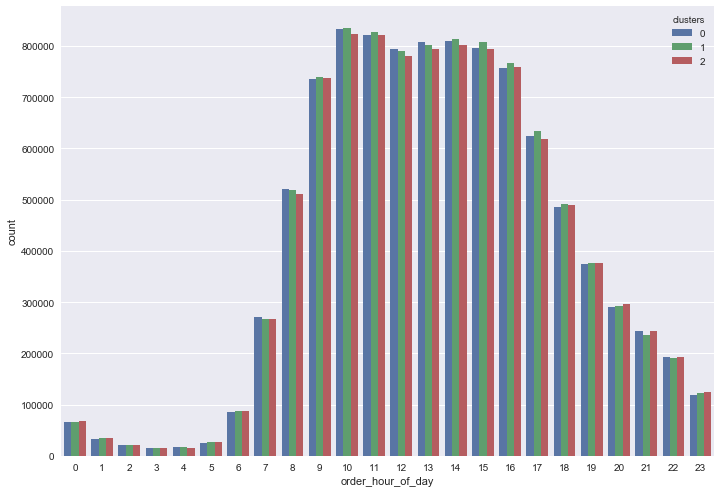

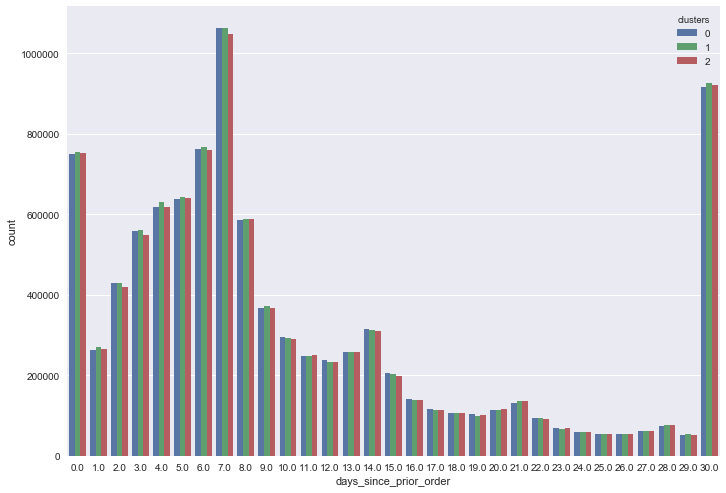

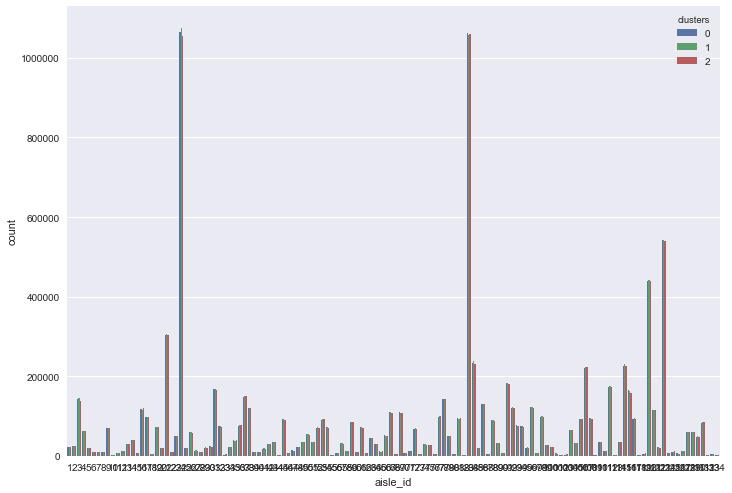

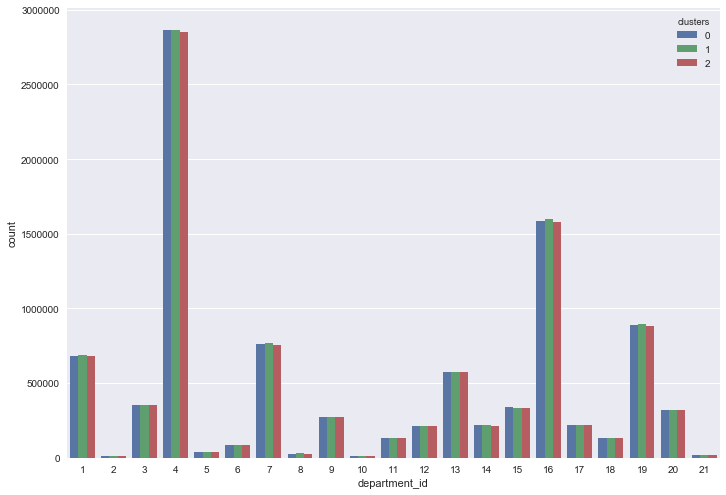

In [27]:
for feature in value_count_columns:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=X.clusters, data=X, ax=ax)
    plt.show()

In [28]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
merged_data_fitted = kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels

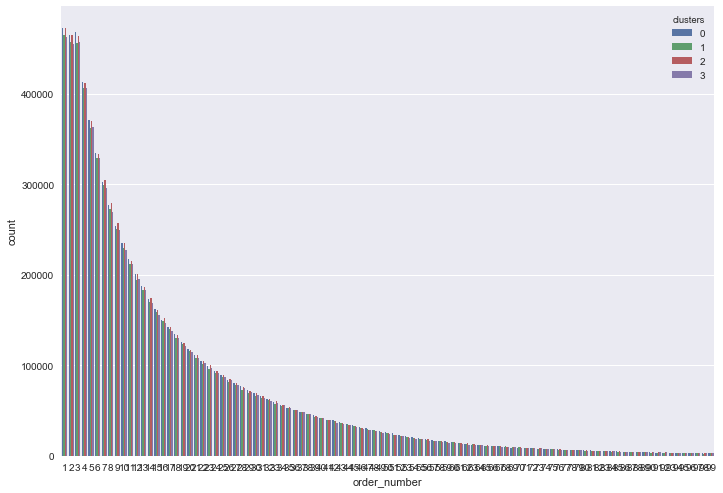

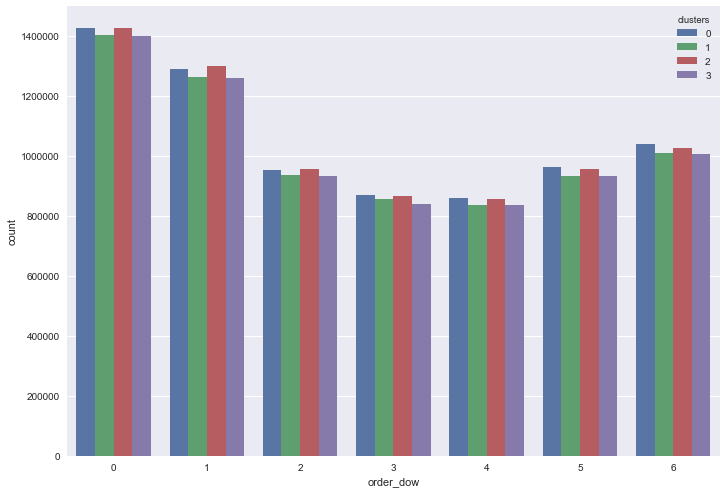

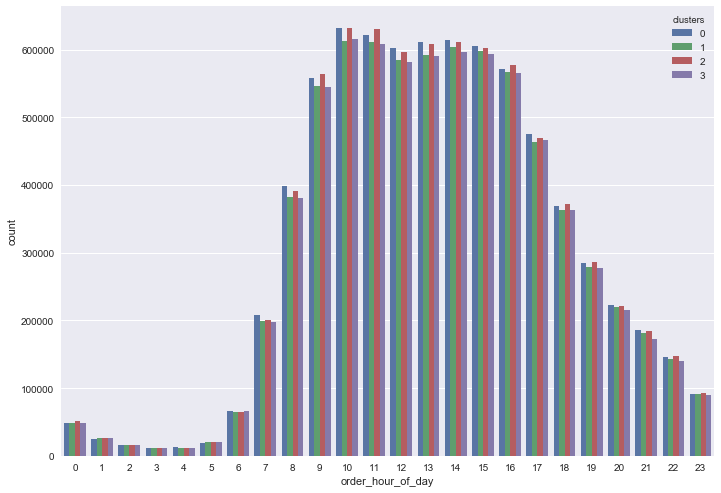

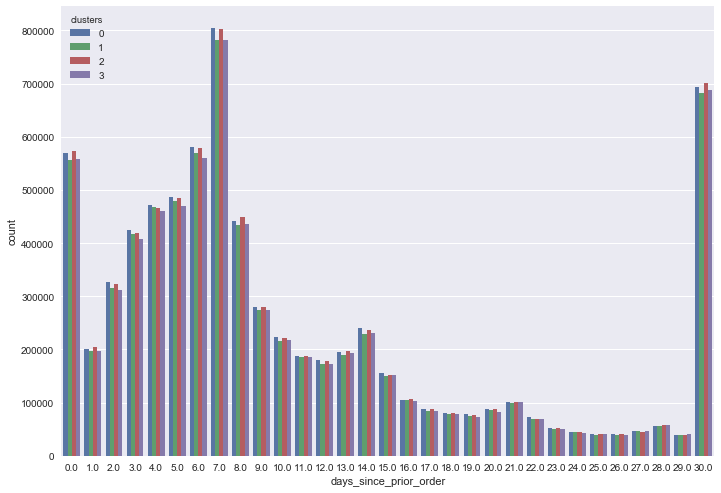

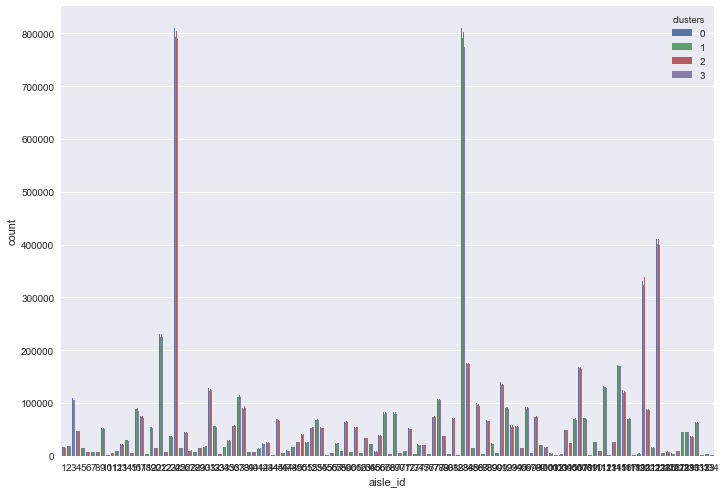

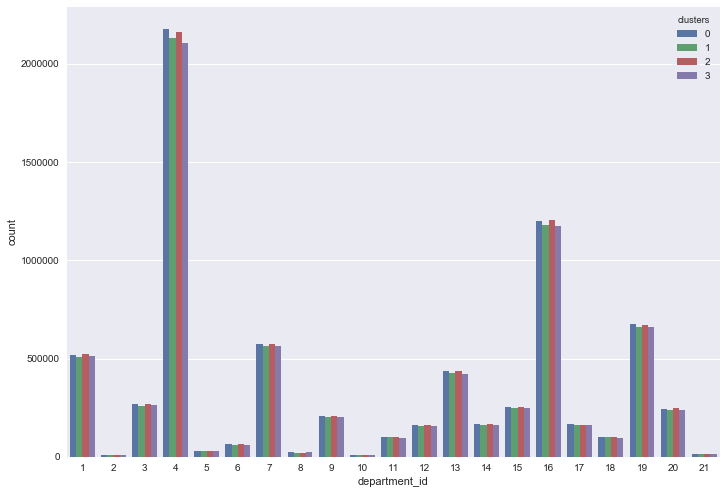

In [29]:
for feature in value_count_columns:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=X.clusters, data=X, ax=ax)
    plt.show()

In [30]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
merged_data_fitted = kmeans.fit(X)
labels = kmeans.labels_
X['clusters'] = labels
merged_data['clusters'] = labels

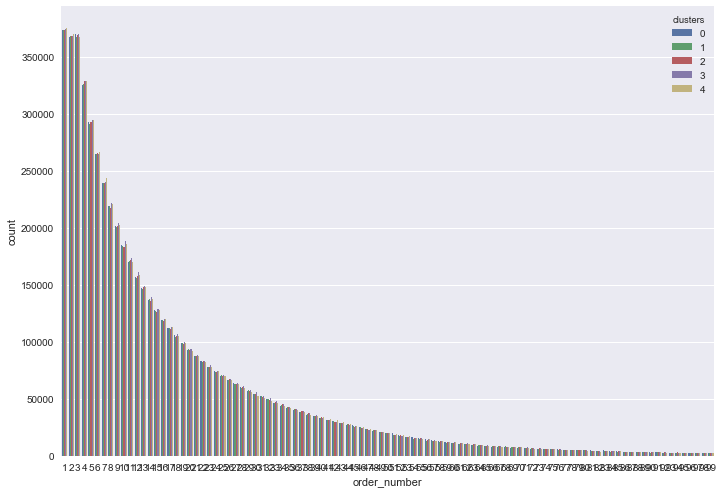

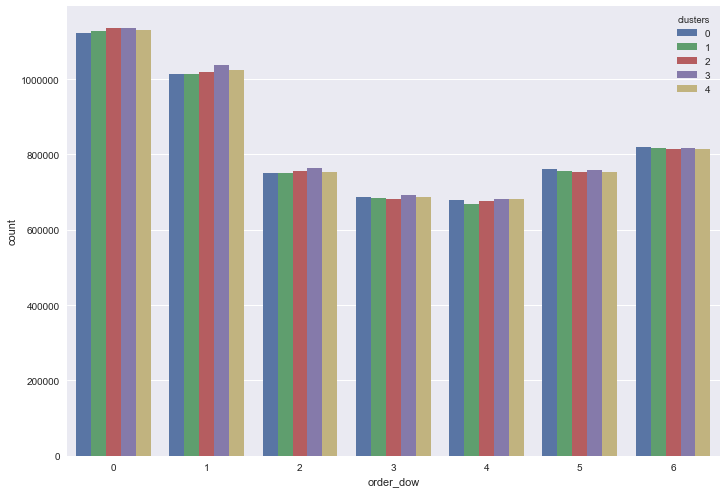

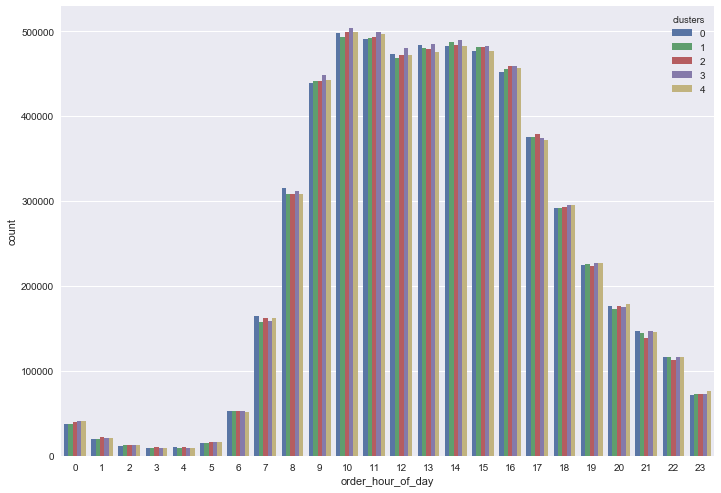

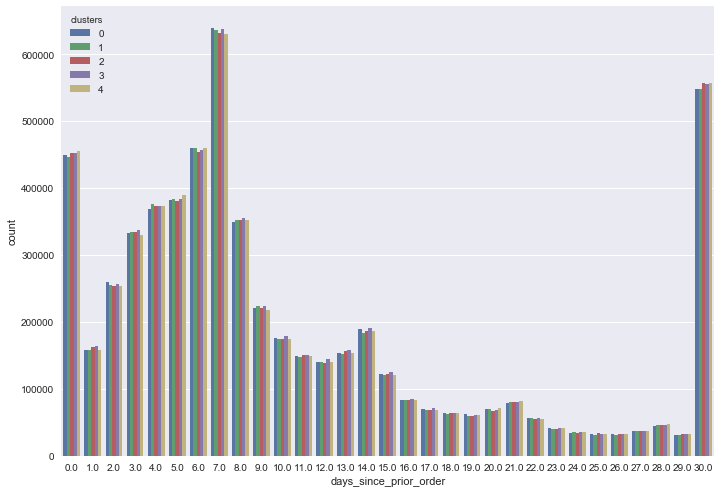

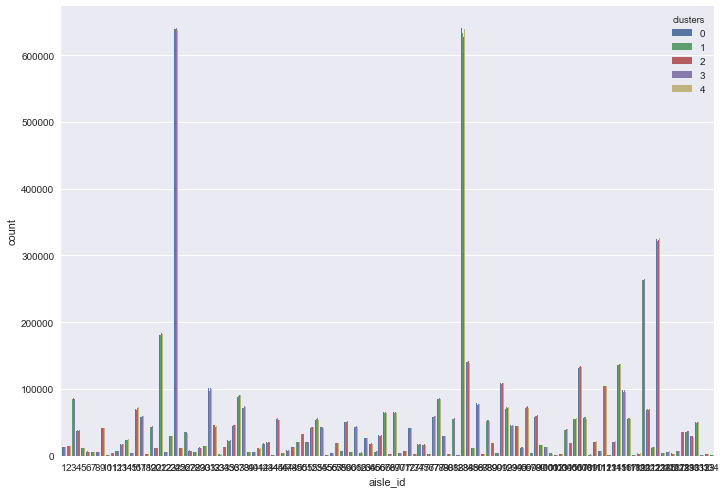

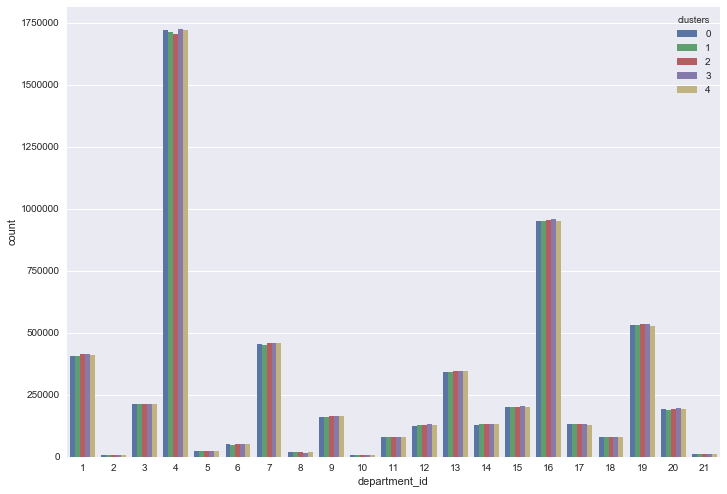

In [31]:
for feature in value_count_columns:
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.countplot(x=feature, hue=X.clusters, data=X, ax=ax)
    plt.show()

In [32]:
grouped = X.groupby(['clusters', 'product_id']).product_id.value_counts().nlargest(100)
print(grouped)
"""grouped = pd.merge(left=grouped,right=products, how='left', left_on='product_id', right_on='product_id')
grouped.head(10)"""

clusters  product_id  product_id
3         24852       24852         72940
4         24852       24852         72721
0         24852       24852         72323
1         24852       24852         72002
2         24852       24852         71663
          13176       13176         61436
3         13176       13176         60956
0         13176       13176         59510
4         13176       13176         59328
1         13176       13176         59232
2         21137       21137         47857
1         21137       21137         47470
4         21137       21137         47354
0         21137       21137         47116
3         21137       21137         46911
          21903       21903         44468
0         21903       21903         44257
2         21903       21903         43715
4         21903       21903         43297
1         21903       21903         42641
0         47209       47209         38887
3         47209       47209         38508
1         47209       47209         37937
2

"grouped = pd.merge(left=grouped,right=products, how='left', left_on='product_id', right_on='product_id')\ngrouped.head(10)"

In [33]:
product_range = range(5000)
merged_data2 = merged_data[merged_data.product_id.isin(product_range)]
merged_data2 = resample(merged_data2, n_samples=100000)
X = merged_data2.drop(['order_id', 'product_name', 'eval_set', 'product_id', 'department', 'aisle'], 1)
y = merged_data2['product_id']
sample_weight = np.random.RandomState(42).rand(y.shape[0])
X_train, X_test, y_train, y_test, sw_train, sw_test= train_test_split(X, y, sample_weight, test_size=0.4, random_state=0)


In [34]:
#Create a testing function that will fit the test the data.
"""def testing_func(test):
    # This is a local list used to temporarily store scores
    scores=[]
    # This list serves the For loop below putting the variables in   
    for x in models:
        #Fitting to Training Data
        test.fit(X_train, y_train)
        #Training Data Score
        y_pred = model.predict_proba(X_test)
        conf_mat = confusion_matrix(y_test, y_pred)
        ytest_labels = list(set(y_test))
        ypred_labels = list(set(y_pred))
        combined_list = list(set(y_test + y_pred))
        fig, ax = plt.subplots(figsize=(10,10))
        sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=combined_list, yticklabels=combined_list)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.show()
        scores.append(test.score(x[0], x[1]))
        #Test Data Score
        scores.append(test.score(x[2], x[3]))
        #CV Score
        scores.append(np.mean(cross_val_score(test, x[0], x[1], cv=5)))
    
    # Create a local dataframe to display our results cleanly
    local_results_df=pd.DataFrame(scores, columns=['Accuracy'], index=[method])
    print(local_results_df)
    model = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')"""


"def testing_func(test):\n    # This is a local list used to temporarily store scores\n    scores=[]\n    # This list serves the For loop below putting the variables in   \n    for x in models:\n        #Fitting to Training Data\n        test.fit(X_train, y_train)\n        #Training Data Score\n        y_pred = model.predict_proba(X_test)\n        conf_mat = confusion_matrix(y_test, y_pred)\n        ytest_labels = list(set(y_test))\n        ypred_labels = list(set(y_pred))\n        combined_list = list(set(y_test + y_pred))\n        fig, ax = plt.subplots(figsize=(10,10))\n        sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=combined_list, yticklabels=combined_list)\n        plt.ylabel('Actual')\n        plt.xlabel('Predicted')\n        plt.show()\n        scores.append(test.score(x[0], x[1]))\n        #Test Data Score\n        scores.append(test.score(x[2], x[3]))\n        #CV Score\n        scores.append(np.mean(cross_val_score(test, x[0], x[1], cv=5)))\n    \n    # Create 

In [35]:
def testing_func(test):

    test.fit(X_train, y_train) 
    print('Training Set:', test.score(X_train, y_train))
    #Test Data Score
    print('Test Set: ', test.score(X_test, y_test))
    #CV Score
    """print('CV:', np.mean(cross_val_score(test, X_train, y_train, cv=5)))"""
    prob_pos_clf = test.predict_proba(X_test)[:, 1]

    """# Gaussian Naive-Bayes with isotonic calibration
    clf_isotonic = CalibratedClassifierCV(test, cv=2, method='isotonic')
    clf_isotonic.fit(X_train, y_train, sw_train)
    prob_pos_isotonic = clf_isotonic.predict_proba(X_test)[:, 1]

    # Gaussian Naive-Bayes with sigmoid calibration
    clf_sigmoid = CalibratedClassifierCV(test, cv=2, method='sigmoid')
    clf_sigmoid.fit(X_train, y_train, sw_train)
    prob_pos_sigmoid = clf_sigmoid.predict_proba(X_test)[:, 1]"""

    print("Brier scores: (the smaller the better)")

    clf_score = brier_score_loss(y_test, prob_pos_clf, sw_test)
    print("No calibration: {}".format(clf_score))

    """clf_isotonic_score = brier_score_loss(y_test, prob_pos_isotonic, sw_test)
    print("With isotonic calibration: {}".format(clf_isotonic_score))

    clf_sigmoid_score = brier_score_loss(y_test, prob_pos_sigmoid, sw_test)
    print("With sigmoid calibration: {}".format(clf_sigmoid_score))"""

In [36]:
start = datetime.now()
lr = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
testing_func(lr)
print('\nIt took the following time to complete this task:', datetime.now() - start)

Training Set: 0.03303333333333333
Test Set:  0.03235
Brier scores: (the smaller the better)
No calibration: 2.3188920636747304e-06

It took the following time to complete this task: 0:21:40.571944


In [37]:
start = datetime.now()
svc = SVC(C=1)
testing_func(svc)
print('\nIt took the following time to complete this task:', datetime.now() - start)

Training Set: 1.0
Test Set:  0.056175


AttributeError: predict_proba is not available when  probability=False

In [ ]:
start = datetime.now()
qda = QuadraticDiscriminantAnalysis()
testing_func(qda)
print('\n It took the following time to complete this task:', datetime.now() - start)

In [ ]:
start = datetime.now()
rfc = RandomForestClassifier(n_estimators=100, n_jobs=4)
testing_func(rfc)
print('\n It took the following time to complete this task:', datetime.now() - start)